In [2]:
import ee
ee.Authenticate()
ee.Initialize(project="lulc1694")

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


#Alok terminal

### generating the random datasets using This dataset includes the following variables:

Land Surface Temperature (°C): The temperature of the Earth's surface.
NDVI (Normalized Difference Vegetation Index): Reflects the vegetation density.
Sea Surface Temperature (°C): Temperature of the sea surface.
Carbon Dioxide (ppm): The concentration of CO2 in the atmosphere.
Precipitation (mm): The amount of rainfall or precipitation.

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
dates = pd.date_range(start="2014-01-01", end="2024-01-01", freq="D").tolist()
data = {
    "Date": np.random.choice(dates, 100),
    "Land Surface Temperature (°C)": np.random.uniform(20, 35, 100),  
    "NDVI": np.random.uniform(0, 0.8, 100), 
    "Sea Surface Temperature (°C)": np.random.uniform(27, 31, 100),  
    "Carbon Dioxide (ppm)": np.random.uniform(380, 420, 100), 
    "Precipitation (mm)": np.random.uniform(50, 150, 100)  
}

df = pd.DataFrame(data)
file_path = "climate_data.csv"
df.to_csv(file_path, index=False)

file_path


'climate_data.csv'

##predicting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
data = pd.read_csv('climate_data.csv')
data['Year'] = pd.to_datetime(data['Date']).dt.year
X = data[['Year', 'NDVI', 'Sea Surface Temperature (°C)', 'Carbon Dioxide (ppm)', 'Precipitation (mm)']]  # Features
y = data['Sea Surface Temperature (°C)']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
new_year_data = pd.DataFrame({
    'Year': [2025],
    'NDVI': [0.45],  
    'Sea Surface Temperature (°C)': [29.0],  
    'Carbon Dioxide (ppm)': [420], 
    'Precipitation (mm)': [500]  
})
new_year_data_scaled = scaler.transform(new_year_data)
predicted_temp = model.predict(new_year_data_scaled)
print(f'Predicted Sea Surface Temperature for 2025: {predicted_temp[0]} °C')


Mean Absolute Error (MAE): 0.0
Predicted Sea Surface Temperature for 2025: 29.000000000000007 °C


##PREDICTING WITH DATA

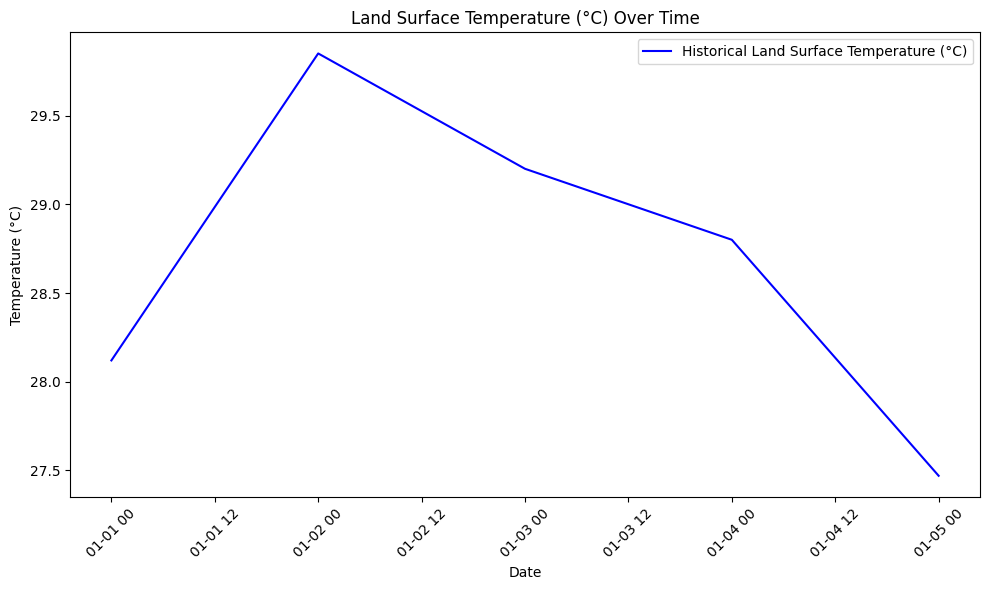

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


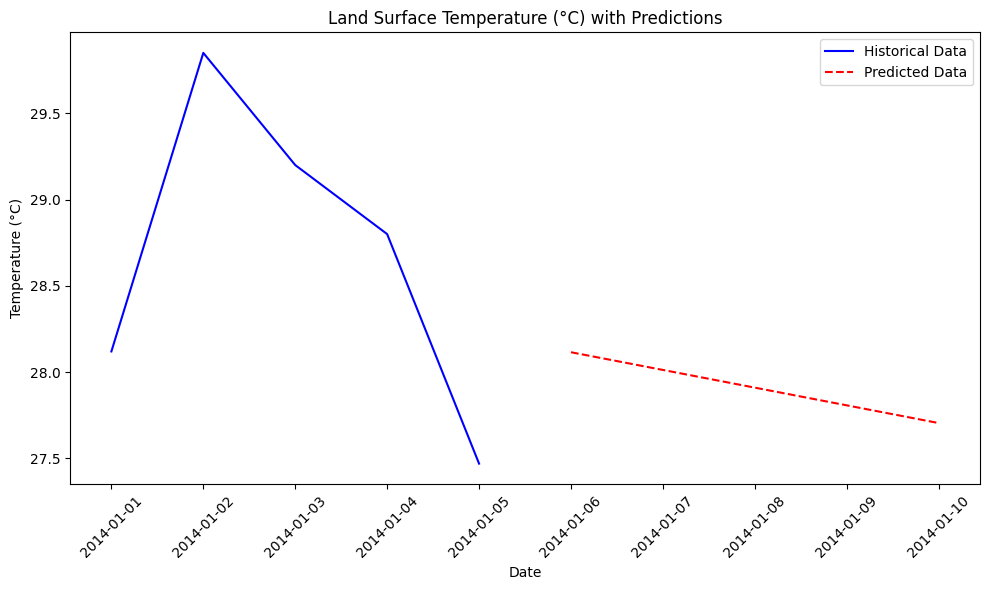

Predicted Land Surface Temperature (°C) for next 5 days: [28.11542857 28.01285714 27.91028571 27.80771429 27.70514286]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = {
    'Date': ['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05'],
    'Land Surface Temperature (°C)': [28.12, 29.85, 29.20, 28.80, 27.47],
    'NDVI': [0.51, 0.69, 0.59, 0.65, 0.77],
    'Sea Surface Temperature (°C)': [29.28, 28.17, 28.32, 29.80, 29.21],
    'Carbon Dioxide (ppm)': [398.62, 404.38, 404.49, 405.65, 406.71],
    'Precipitation (mm)': [94.12, 126.10, 110.21, 123.06, 102.80]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Land Surface Temperature (°C)'], label='Historical Land Surface Temperature (°C)', color='b')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Land Surface Temperature (°C) Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['Days'] = (df.index - df.index[0]).days  
X = df[['Days']]  # Feature (time in days)
y = df['Land Surface Temperature (°C)'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
future_days = np.array([df['Days'].max() + i for i in range(1, 6)]).reshape(-1, 1)
predictions = model.predict(future_days)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Land Surface Temperature (°C)'], label='Historical Data', color='b')
predicted_dates = pd.date_range(start=df.index[-1], periods=6, freq='D')[1:]  # Next 5 days from last date
plt.plot(predicted_dates, predictions, label='Predicted Data', color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Land Surface Temperature (°C) with Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Predicted Land Surface Temperature (°C) for next 5 days: {predictions}")


###Time Series forcasting using LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.3393 - val_loss: 0.1386
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1624 - val_loss: 0.0608
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0983 - val_loss: 0.0939
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1175 - val_loss: 0.0705
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0863 - val_loss: 0.0621
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1093 - val_loss: 0.0647
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1043 - val_loss: 0.0629
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0839 - val_loss: 0.0635
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0922 - val_loss: 0.0662
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0944 - val_loss: 0.0657
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0843 - val_loss: 0.0644
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0853 - val_loss: 0.0638
E

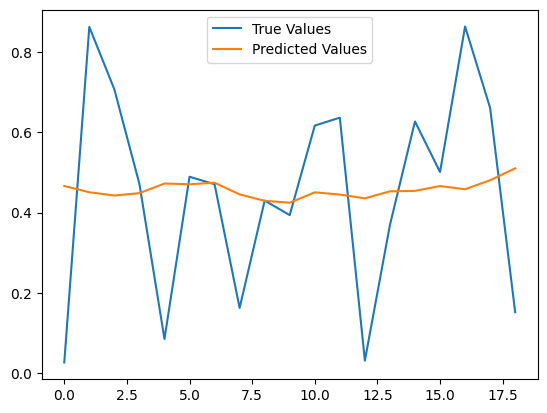

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5 and the array at index 1 has size 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv('climate_data.csv', parse_dates=['Date'], index_col='Date')
data['Year'] = data.index.year
features = ['NDVI', 'Sea Surface Temperature (°C)', 'Carbon Dioxide (ppm)', 'Precipitation (mm)']
target = 'Sea Surface Temperature (°C)'
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length, 1]  
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)
seq_length = 5
X, y = create_sequences(scaled_data, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()
future_data = np.array([scaled_data[-seq_length:]])  
future_temp = model.predict(future_data)
predicted_temp = scaler.inverse_transform(np.concatenate([future_data[0, :, 1:], future_temp], axis=1))[:, -1]
print(f'Predicted Sea Surface Temperature for 2030: {predicted_temp[0]} °C')


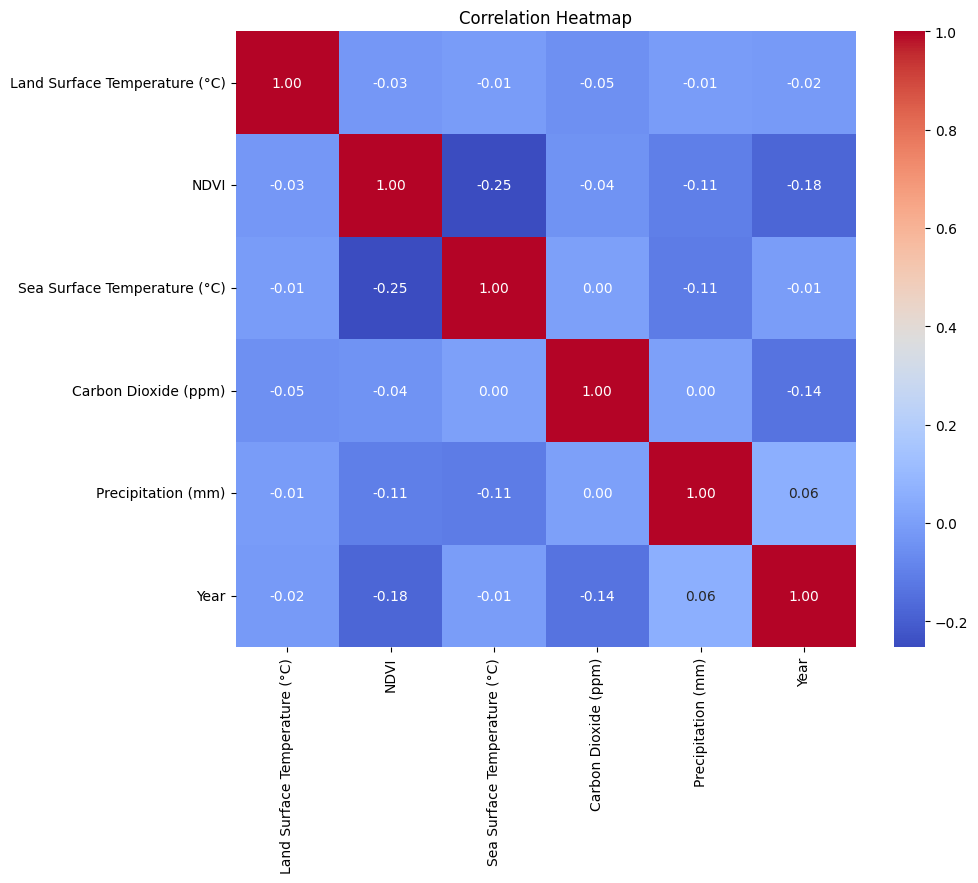

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


#NDVI plotting yearwise

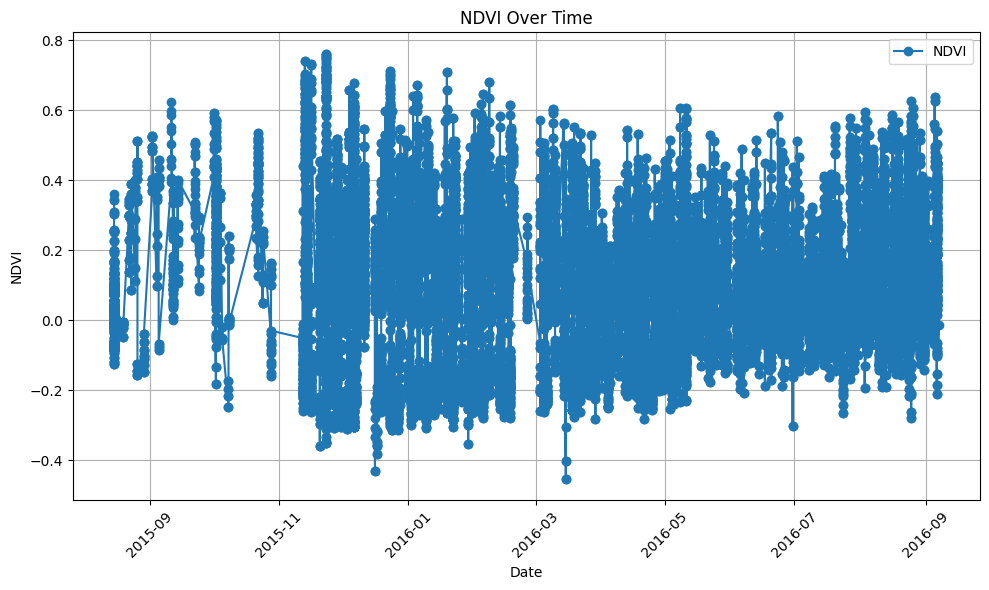

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
file_path = "NDVI_India_Export.csv"
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])

# Plot NDVI against date
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['NDVI'], marker='o', label='NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Over Time')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


##10 year data with rainfall, temperatur, sea temperature, and date, greenhouse gas

In [14]:

india = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'India'))
start_year = 2014
end_year = 2023
years = list(range(start_year, end_year + 1))
def calculate_metrics(year):
    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = start_date.advance(1, 'year')
    ndvi = ee.ImageCollection("MODIS/061/MOD13A1") \
        .filterDate(start_date, end_date) \
        .select('NDVI') \
        .mean() \
        .reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=india.geometry(),
            scale=5000,
            maxPixels=1e13
        ).get('NDVI')
    sst = ee.ImageCollection("NOAA/CDR/OISST/V2_1") \
        .filterDate(start_date, end_date) \
        .select('sst') \
        .mean() \
        .reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=india.geometry(),
            scale=5000,
            maxPixels=1e13
        ).get('sst')
    co2 = 400 + (year - start_year) * 2.5  # Linear approximation
    precipitation = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY") \
        .filterDate(start_date, end_date) \
        .sum() \
        .reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=india.geometry(),
            scale=5000,
            maxPixels=1e13
        ).get('precipitation')
    return {
        'Year': year,
        'NDVI': ndvi.getInfo(),
        'Sea_Surface_Temperature': sst.getInfo(),
        'Carbon_Dioxide': co2,
        'Precipitation': precipitation.getInfo()
    }
data = []
for year in years:
    print(f"Processing year: {year}")
    data.append(calculate_metrics(year))
df = pd.DataFrame(data)

print(df)
df.to_csv("India_Climate_Analysis.csv", index=False)
from google.colab import files
files.download("India_Climate_Analysis.csv")


Processing year: 2014
Processing year: 2015
Processing year: 2016
Processing year: 2017
Processing year: 2018
Processing year: 2019
Processing year: 2020
Processing year: 2021
Processing year: 2022
Processing year: 2023
   Year         NDVI  Sea_Surface_Temperature  Carbon_Dioxide  Precipitation
0  2014  4500.298355              2806.624031           400.0    1093.457179
1  2015  4576.383321              2829.165766           402.5    1088.483587
2  2016  4355.618354              2825.935348           405.0    1203.546493
3  2017  4530.881769              2815.478728           407.5    1227.131331
4  2018  4321.088403              2806.101794           410.0    1152.653041
5  2019  4541.931249              2824.602916           412.5    1306.465450
6  2020  4856.169862              2844.055979           415.0    1349.629089
7  2021  4736.607566              2834.639410           417.5    1285.661240
8  2022  4776.786272              2819.342167           420.0    1296.288172
9  2023  4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Year         NDVI  Sea_Surface_Temperature  Carbon_Dioxide  Precipitation
0  2014  4500.298355              2806.624031           400.0    1093.457179
1  2015  4576.383321              2829.165766           402.5    1088.483587
2  2016  4355.618354              2825.935348           405.0    1203.546493
3  2017  4530.881769              2815.478728           407.5    1227.131331
4  2018  4321.088403              2806.101794           410.0    1152.653041


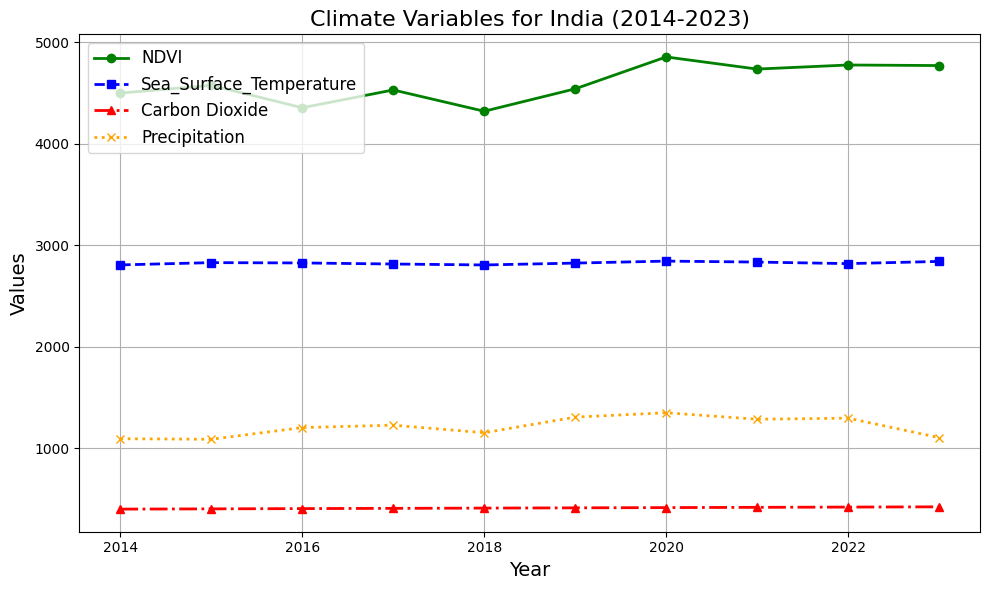

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('India_Climate_Analysis.csv')
print(df.head())
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['NDVI'], label='NDVI', color='green', marker='o', linestyle='-', linewidth=2)
plt.plot(df['Year'], df['Sea_Surface_Temperature'], label='Sea_Surface_Temperature', color='blue', marker='s', linestyle='--', linewidth=2)
plt.plot(df['Year'], df['Carbon_Dioxide'], label='Carbon Dioxide', color='red', marker='^', linestyle='-.', linewidth=2)
plt.plot(df['Year'], df['Precipitation'], label='Precipitation', color='orange', marker='x', linestyle=':', linewidth=2)
plt.title('Climate Variables for India (2014-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


##linear regression to predict the global warming

Mean Squared Error: 3.5362002887033306
R-squared: -13.657353589773031


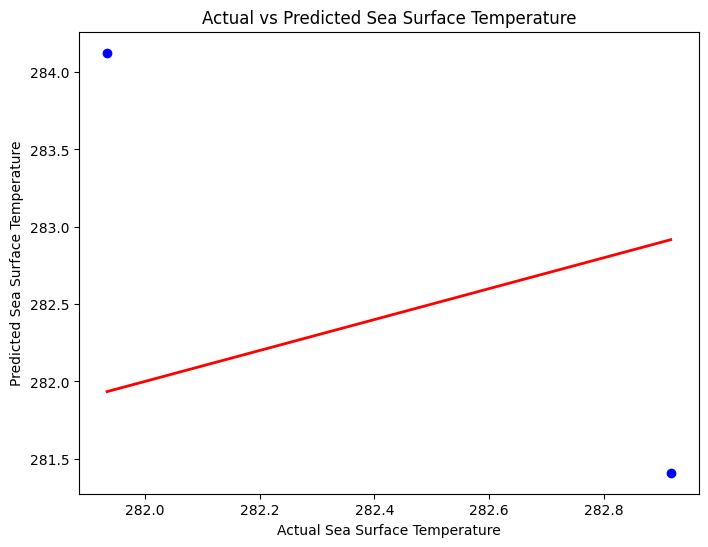

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('India_Climate_Analysis.csv')
df['NDVI'] = df['NDVI'] / 10000  # Rescale NDVI
df['Sea_Surface_Temperature'] = df['Sea_Surface_Temperature'] / 10  # Rescale SST to actual temperature
X = df[['NDVI', 'Carbon_Dioxide', 'Precipitation']]
y = df['Sea_Surface_Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Sea Surface Temperature')
plt.ylabel('Predicted Sea Surface Temperature')
plt.title('Actual vs Predicted Sea Surface Temperature')
plt.show()


##DATASETS of greenhouse GAses

In [36]:
import pandas as pd
import ee
ee.Authenticate()
ee.Initialize(project="lulc-438920")
india_bbox = ee.Geometry.BBox(68.7, 7.9, 97.25, 37.6)
collection = ee.ImageCollection('NASA/OCO2/L2_Lite_FP') \
    .filterBounds(india_bbox) \
    .filterDate('2010-01-01', '2024-12-31')

def calculate_monthly_co2(year, month):
    start_date = f"{year:04d}-{month:02d}-01"
    end_date = ee.Date(start_date).advance(1, 'month')

    monthly_collection = collection.filterDate(start_date, end_date)
    count = monthly_collection.size().getInfo()
    if count == 0:
        return None
    monthly_mean = monthly_collection.mean().reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=india_bbox,
        scale=5000,  # 5 km resolution
        maxPixels=1e12
    )

    co2_value = monthly_mean.get('xco2')  # xco2 represents column-averaged CO₂
    return co2_value.getInfo() if co2_value else None
years = list(range(2010, 2025))
months = [1, 4, 7, 10, 12]  # Jan, Apr, Jul, Oct, Dec
data = []

for year in years:
    for month in months:
        print(f"Processing Year {year}, Month {month}...")
        try:
            co2_value = calculate_monthly_co2(year, month)
            if co2_value is not None:
                data.append({
                    'Year': year,
                    'Month': month,
                    'CO2': co2_value
                })
            else:
                print(f"No data available for {year}-{month:02d}.")
        except Exception as e:
            print(f"Error processing {year}-{month:02d}: {e}")
            data.append({
                'Year': year,
                'Month': month,
                'CO2': None
            })
df = pd.DataFrame(data)
df.to_csv('co2_data_2010_to_2024.csv', index=False)
print("CO2 data saved to co2_data_2010_to_2024.csv")


Processing Year 2010, Month 1...


Error processing 2010-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2010, Month 4...


Error processing 2010-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2010, Month 7...


Error processing 2010-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2010, Month 10...
Error processing 2010-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2010, Month 12...
Error processing 2010-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageC

Error processing 2011-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2011, Month 4...


Error processing 2011-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2011, Month 7...


Error processing 2011-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2011, Month 10...


Error processing 2011-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2011, Month 12...
Error processing 2011-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2012, Month 1...


Error processing 2012-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2012, Month 4...


Error processing 2012-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2012, Month 7...
Error processing 2012-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2012, Month 10...


Error processing 2012-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2012, Month 12...


Error processing 2012-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2013, Month 1...


Error processing 2013-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2013, Month 4...
Error processing 2013-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2013, Month 7...


Error processing 2013-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2013, Month 10...


Error processing 2013-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2013, Month 12...


Error processing 2013-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2014, Month 1...
Error processing 2014-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2014, Month 4...
Error processing 2014-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageCon

Error processing 2014-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2014, Month 10...


Error processing 2014-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2014, Month 12...
Error processing 2014-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2015, Month 1...


Error processing 2015-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2015, Month 4...


Error processing 2015-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2015, Month 7...
Error processing 2015-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2015, Month 10...


Error processing 2015-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2015, Month 12...


Error processing 2015-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2016, Month 1...


Error processing 2016-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2016, Month 4...
Error processing 2016-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2016, Month 7...


Error processing 2016-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2016, Month 10...
Error processing 2016-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2016, Month 12...


Error processing 2016-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2017, Month 1...
Error processing 2017-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2017, Month 4...
Error processing 2017-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageCon

Error processing 2017-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2017, Month 10...
Error processing 2017-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2017, Month 12...
Error processing 2017-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageC

Error processing 2018-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2018, Month 4...
Error processing 2018-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2018, Month 7...


Error processing 2018-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2018, Month 10...
Error processing 2018-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2018, Month 12...


Error processing 2018-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2019, Month 1...
Error processing 2019-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2019, Month 4...
Error processing 2019-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageCon

Error processing 2019-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2019, Month 10...
Error processing 2019-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2019, Month 12...
Error processing 2019-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageC

Error processing 2020-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2020, Month 4...
Error processing 2020-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2020, Month 7...
Error processing 2020-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageCon

Error processing 2020-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2021, Month 1...
Error processing 2021-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2021, Month 4...
Error processing 2021-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageCon

Error processing 2021-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2021, Month 10...
Error processing 2021-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2021, Month 12...
Error processing 2021-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageC

Error processing 2022-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2022, Month 4...
Error processing 2022-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2022, Month 7...
Error processing 2022-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageCon

Error processing 2022-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2022, Month 12...
Error processing 2022-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2023, Month 1...
Error processing 2023-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageCo

Error processing 2023-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2023, Month 7...
Error processing 2023-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2023, Month 10...


Error processing 2023-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2023, Month 12...
Error processing 2023-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2024, Month 1...


Error processing 2024-01: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2024, Month 4...
Error processing 2024-04: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2024, Month 7...
Error processing 2024-07: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageCon

Error processing 2024-10: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
Processing Year 2024, Month 12...
Error processing 2024-12: Caller does not have required permission to use project lulc-438920. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=lulc-438920 and then retry. Propagation of the new permission may take a few minutes.
CO2 data saved to co2_data_2010_to_2024.csv


##precipitation Datasets

In [2]:

india_bbox = ee.Geometry.BBox(68.7, 7.9, 97.25, 37.6)

collection = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
    .filterBounds(india_bbox) \
    .filterDate('2010-01-01', '2024-12-31')
def calculate_monthly_precipitation(year, month):
    start_date = f"{year:04d}-{month:02d}-01"
    end_date = ee.Date(start_date).advance(1, 'month')
    monthly_collection = collection.filterDate(start_date, end_date)
    count = monthly_collection.size().getInfo()
    if count == 0:
        return None

    monthly_sum = monthly_collection.sum().reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=india_bbox,
        scale=5000,  # 5 km resolution
        maxPixels=1e12
    )


    precip_value = monthly_sum.get('precipitation')
    return precip_value.getInfo() if precip_value else None

years = list(range(2010, 2025))
months = [1, 4, 7, 10, 12]  # Jan, Apr, Jul, Oct, Dec
data = []

for year in years:
    for month in months:
        print(f"Processing Year {year}, Month {month}...")
        try:
            precip_value = calculate_monthly_precipitation(year, month)
            if precip_value is not None:
                data.append({
                    'Year': year,
                    'Month': month,
                    'Precipitation': precip_value
                })
            else:
                print(f"No data available for {year}-{month:02d}.")
        except Exception as e:
            print(f"Error processing {year}-{month:02d}: {e}")
            data.append({
                'Year': year,
                'Month': month,
                'Precipitation': None
            })

df = pd.DataFrame(data)
df.to_csv('precipitation_data_2010_to_2024.csv', index=False)
print("Precipitation data saved to precipitation_data_2010_to_2024.csv")


Processing Year 2010, Month 1...
Processing Year 2010, Month 4...
Processing Year 2010, Month 7...
Processing Year 2010, Month 10...
Processing Year 2010, Month 12...
Processing Year 2011, Month 1...
Processing Year 2011, Month 4...
Processing Year 2011, Month 7...
Processing Year 2011, Month 10...
Processing Year 2011, Month 12...
Processing Year 2012, Month 1...
Processing Year 2012, Month 4...
Processing Year 2012, Month 7...
Processing Year 2012, Month 10...
Processing Year 2012, Month 12...
Processing Year 2013, Month 1...
Processing Year 2013, Month 4...
Processing Year 2013, Month 7...
Processing Year 2013, Month 10...
Processing Year 2013, Month 12...
Processing Year 2014, Month 1...
Processing Year 2014, Month 4...
Processing Year 2014, Month 7...
Processing Year 2014, Month 10...
Processing Year 2014, Month 12...
Processing Year 2015, Month 1...
Processing Year 2015, Month 4...
Processing Year 2015, Month 7...
Processing Year 2015, Month 10...
Processing Year 2015, Month 12..

##sea surface temperature

In [3]:

india_bbox = ee.Geometry.BBox(68.7, 7.9, 97.25, 37.6)

collection = ee.ImageCollection('NOAA/CDR/OISST/V2_1') \
    .filterBounds(india_bbox) \
    .filterDate('2010-01-01', '2024-12-31')

def calculate_monthly_sst(year, month):
    start_date = f"{year:04d}-{month:02d}-01"
    end_date = ee.Date(start_date).advance(1, 'month')
    monthly_collection = collection.filterDate(start_date, end_date)
    count = monthly_collection.size().getInfo()
    if count == 0:
        return None
    monthly_mean = monthly_collection.mean().reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=india_bbox,
        scale=5000,  # 5 km resolution
        maxPixels=1e12
    )

    sst_value = monthly_mean.get('sst')
    return sst_value.getInfo() if sst_value else None
years = list(range(2010, 2025))
months = [1, 4, 7, 10, 12]  # Jan, Apr, Jul, Oct, Dec

data = []

for year in years:
    for month in months:
        print(f"Processing Year {year}, Month {month}...")
        try:
            sst_value = calculate_monthly_sst(year, month)
            if sst_value is not None:
                data.append({
                    'Year': year,
                    'Month': month,
                    'Sea_Surface_Temperature': sst_value
                })
            else:
                print(f"No data available for {year}-{month:02d}.")
        except Exception as e:
            print(f"Error processing {year}-{month:02d}: {e}")
            data.append({
                'Year': year,
                'Month': month,
                'Sea_Surface_Temperature': None
            })

df = pd.DataFrame(data)
df.to_csv('sea_surface_temperature_2010_to_2024.csv', index=False)
print("Sea Surface Temperature data saved to sea_surface_temperature_2010_to_2024.csv")


Processing Year 2010, Month 1...
Processing Year 2010, Month 4...
Processing Year 2010, Month 7...
Processing Year 2010, Month 10...
Processing Year 2010, Month 12...
Processing Year 2011, Month 1...
Processing Year 2011, Month 4...
Processing Year 2011, Month 7...
Processing Year 2011, Month 10...
Processing Year 2011, Month 12...
Processing Year 2012, Month 1...
Processing Year 2012, Month 4...
Processing Year 2012, Month 7...
Processing Year 2012, Month 10...
Processing Year 2012, Month 12...
Processing Year 2013, Month 1...
Processing Year 2013, Month 4...
Processing Year 2013, Month 7...
Processing Year 2013, Month 10...
Processing Year 2013, Month 12...
Processing Year 2014, Month 1...
Processing Year 2014, Month 4...
Processing Year 2014, Month 7...
Processing Year 2014, Month 10...
Processing Year 2014, Month 12...
Processing Year 2015, Month 1...
Processing Year 2015, Month 4...
Processing Year 2015, Month 7...
Processing Year 2015, Month 10...
Processing Year 2015, Month 12..

#plotting

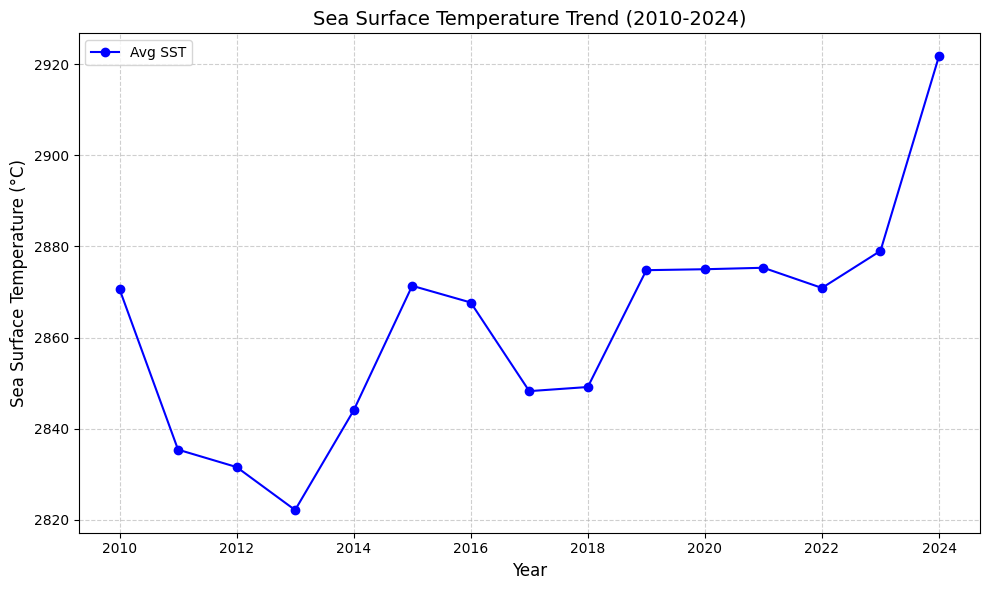

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sea_surface_temperature_2010_to_2024.csv')
average_sst = df.groupby('Year')['Sea_Surface_Temperature'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_sst['Year'], average_sst['Sea_Surface_Temperature'], marker='o', color='blue', label='Avg SST')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea Surface Temperature (°C)', fontsize=12)
plt.title('Sea Surface Temperature Trend (2010-2024)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


##seaborn sea_surface temperature

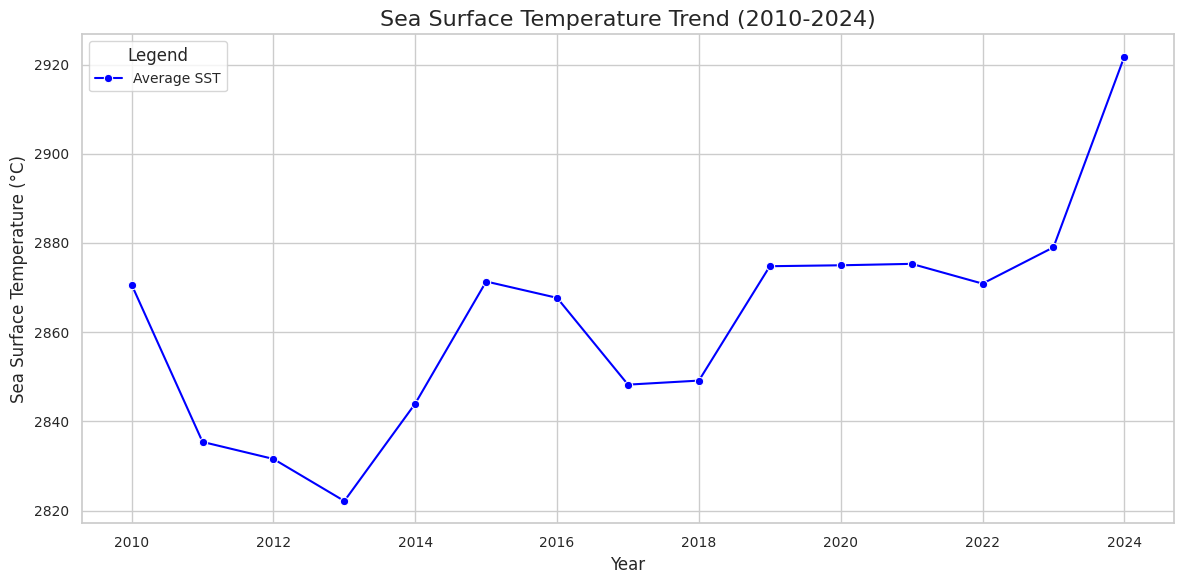

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sea_surface_temperature_2010_to_2024.csv')
average_sst = df.groupby('Year')['Sea_Surface_Temperature'].mean().reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=average_sst,
    x='Year',
    y='Sea_Surface_Temperature',
    marker='o',
    color='blue',
    label='Average SST'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea Surface Temperature (°C)', fontsize=12)
plt.title('Sea Surface Temperature Trend (2010-2024)', fontsize=16)
plt.legend(title='Legend', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##precipitation

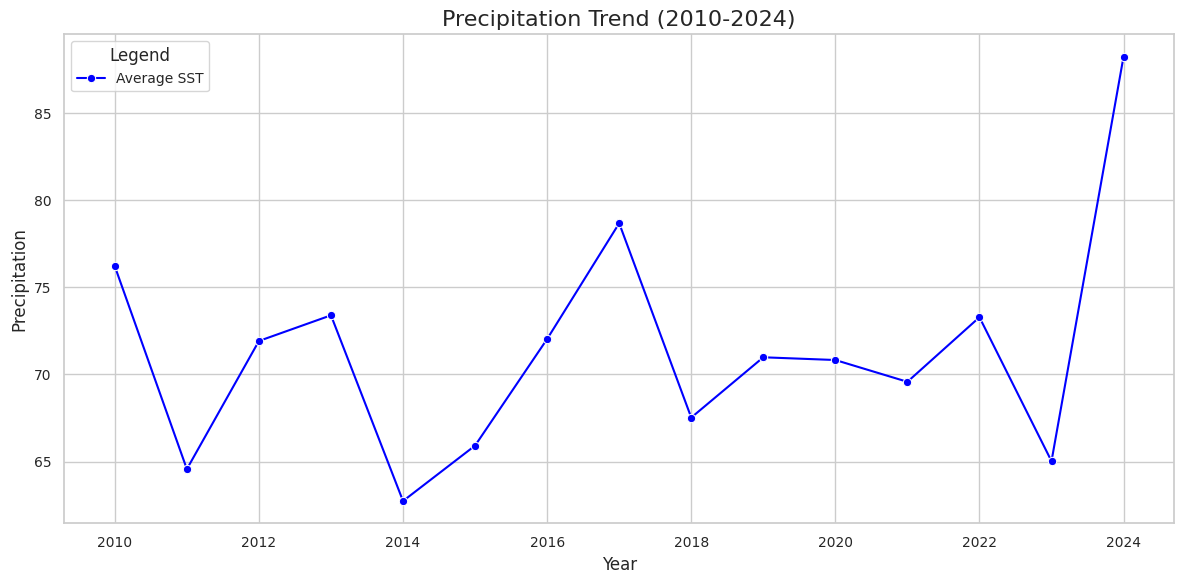

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('precipitation_data_2010_to_2024.csv')
average_sst = df.groupby('Year')['Precipitation'].mean().reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=average_sst,
    x='Year',
    y='Precipitation',
    marker='o',
    color='blue',
    label='Average SST'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Precipitation', fontsize=12)
plt.title('Precipitation Trend (2010-2024)', fontsize=16)
plt.legend(title='Legend', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

##co2 datasets

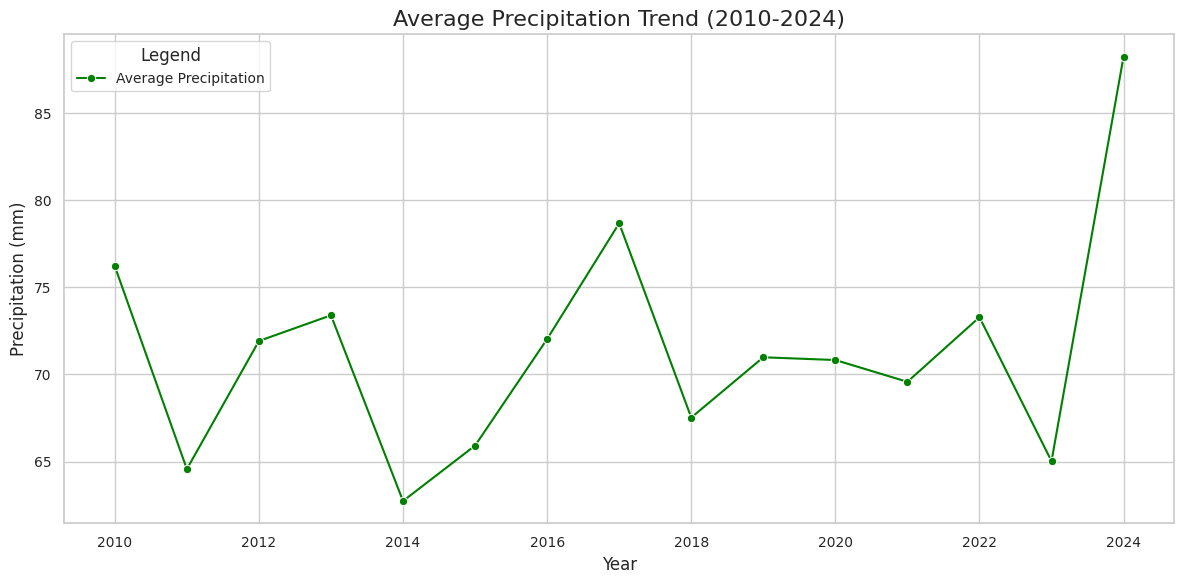

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('precipitation_data_2010_to_2024.csv')
average_precipitation = df.groupby('Year')['Precipitation'].mean().reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=average_precipitation,
    x='Year',
    y='Precipitation',
    marker='o',
    color='green',
    label='Average Precipitation'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
plt.title('Average Precipitation Trend (2010-2024)', fontsize=16)
plt.legend(title='Legend', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##co2 dataset visualization

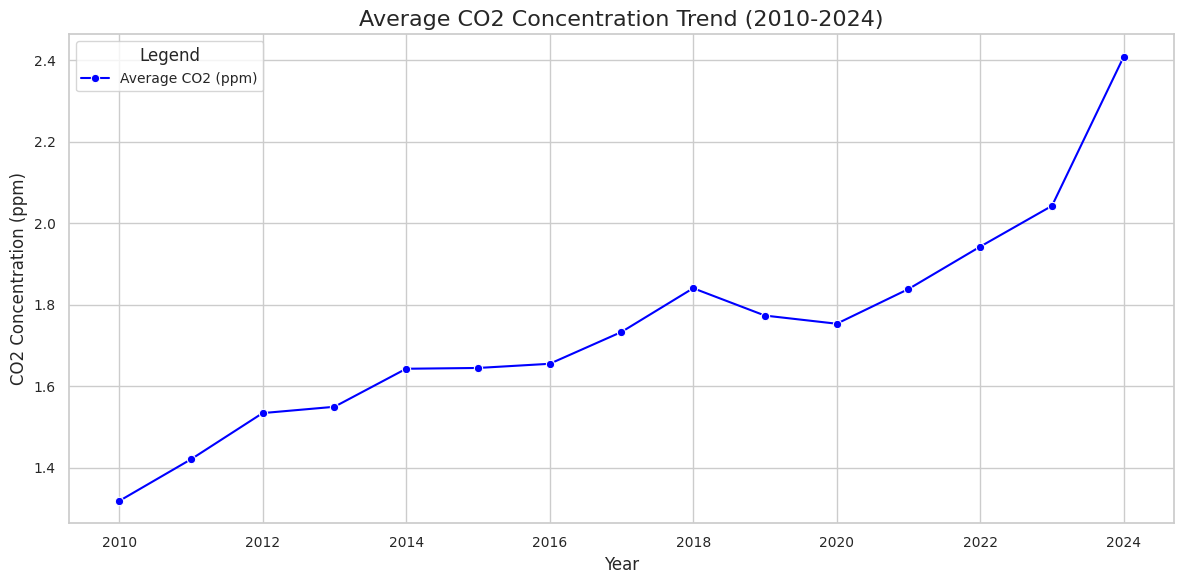

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/co2_data_2010_to_2024 (1).csv')
df['CO2'] = df['CO2'].interpolate()
average_co2 = df.groupby('Year')['CO2'].mean().reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=average_co2,
    x='Year',
    y='CO2',
    marker='o',
    color='blue',
    label='Average CO2 (ppm)'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.title('Average CO2 Concentration Trend (2010-2024)', fontsize=16)
plt.legend(title='Legend', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##ndvi datasets

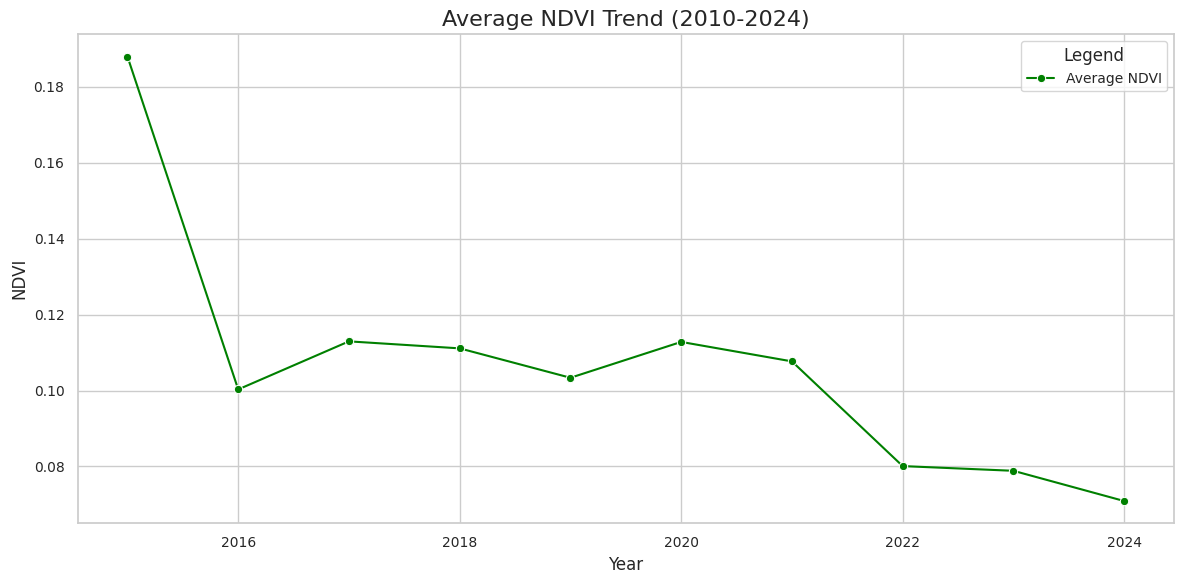

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_ndvi = pd.read_csv('/content/ndvi_data_2010_to_2024.csv')
df_ndvi['NDVI'] = df_ndvi['NDVI'].interpolate()
average_ndvi = df_ndvi.groupby('Year')['NDVI'].mean().reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=average_ndvi,
    x='Year',
    y='NDVI',
    marker='o',
    color='green',
    label='Average NDVI'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('Average NDVI Trend (2010-2024)', fontsize=16)
plt.legend(title='Legend', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


If you're observing a decreasing trend in NDVI, it could indicate:

Environmental degradation, such as deforestation or soil erosion.
Climate change impacts, including droughts or changes in precipitation patterns.
Land use changes, like urbanization or agricultural expansion.

##random practice


In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
ndvi_data = pd.read_csv('/content/ndvi_data_2010_to_2024.csv', parse_dates=['Year'], index_col='Year')
precipitation_data = pd.read_csv('/content/precipitation_data_2010_to_2024.csv', parse_dates=['Year'], index_col='Year')
co2_data = pd.read_csv('/content/co2_data_2010_to_2024 (1).csv', parse_dates=['Year'], index_col='Year')
sst_data = pd.read_csv('/content/sea_surface_temperature_2010_to_2024.csv', parse_dates=['Year'], index_col='Year')

data = pd.merge(ndvi_data, precipitation_data, on='Year', how='inner')
data = pd.merge(data, co2_data, on='Year', how='inner')
data = pd.merge(data, sst_data, on='Year', how='inner')
data['Year'] = data.index.year
features = ['NDVI', 'Precipitation', 'CO2', 'Sea_Surface_Temperature']
target = 'Sea_Surface_Temperature'
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length, 3]  # Predict Sea Surface Temperature (4th column)
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)
seq_length = 5
X, y = create_sequences(scaled_data, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()
future_data = np.array([scaled_data[-seq_length:]])  # Last 'seq_length' data points
future_temp = model.predict(future_data)
predicted_temp = scaler.inverse_transform(np.concatenate([future_data[0, :, :3], future_temp], axis=1))[:, -1]
print(f'Predicted Sea Surface Temperature for 2030: {predicted_temp[0]} °C')


MergeError: Passing 'suffixes' which cause duplicate columns {'Month_x'} is not allowed.

# LSTM & ARIMA

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
data = pd.read_csv('/content/updated_combined_dataset_with_variation.csv')

data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

data.set_index('Date', inplace=True)

features = ['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length, 2]  # Target is Sea_Surface_Temperature
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


##lsmt model building

In [43]:

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - loss: 0.5867 - val_loss: 0.1235
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0550 - val_loss: 0.1608
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0861 - val_loss: 0.0789
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0122 - val_loss: 0.0687
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0213 - val_loss: 0.0716
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0240 - val_loss: 0.0646
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0121 - val_loss: 0.0750
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0116 - val_loss: 0.0769
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0195 - val_loss: 0.0663
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0112 - val_loss: 0.0649
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0123 - val_loss: 0.0649
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0096 - val_loss: 0.0670


##plotting 3 line
1. for normal
2. for prediction till 2010-2040
3. for training and validation

In [51]:
data['Sea_Surface_Temperature'] = data['Sea_Surface_Temperature'] / 100
print(data.head())

            Year  Month       CO2      NDVI  Sea_Surface_Temperature  \
Date                                                                   
2010-01-01  2010      1  0.000130  0.099025                27.484727   
2010-04-01  2010      4  0.000131  0.105772                30.006470   
2010-07-01  2010      7  0.000132  0.101382                29.143959   
2010-10-01  2010     10  0.000134  0.099696                29.059990   
2010-12-01  2010     12  0.000130  0.100060                27.837513   

            Precipitation  
Date                       
2010-01-01       8.978994  
2010-04-01      37.203495  
2010-07-01     241.786271  
2010-10-01      80.579567  
2010-12-01      12.515411  


##Random Forest and gradient boost

Mean Absolute Error (MAE): 0.2255554503010148


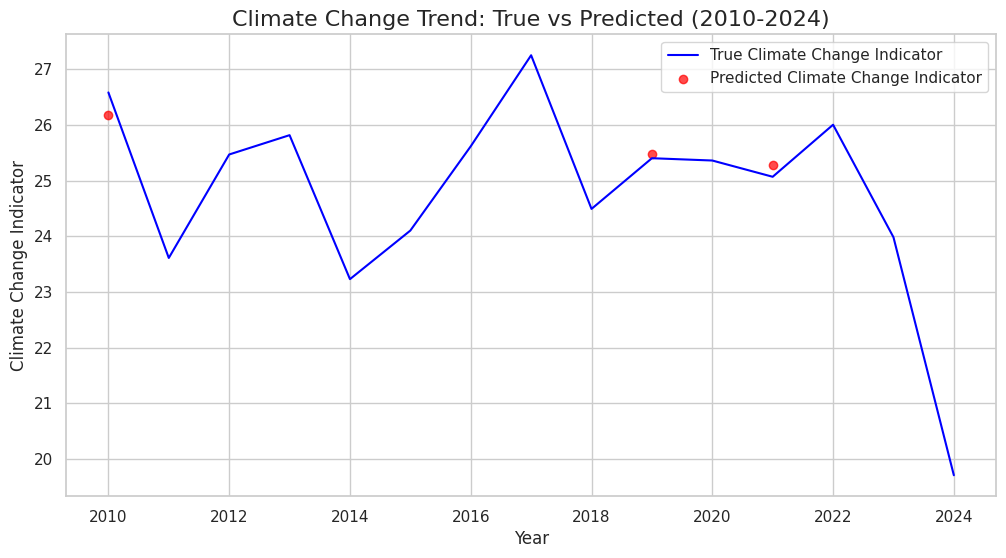

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


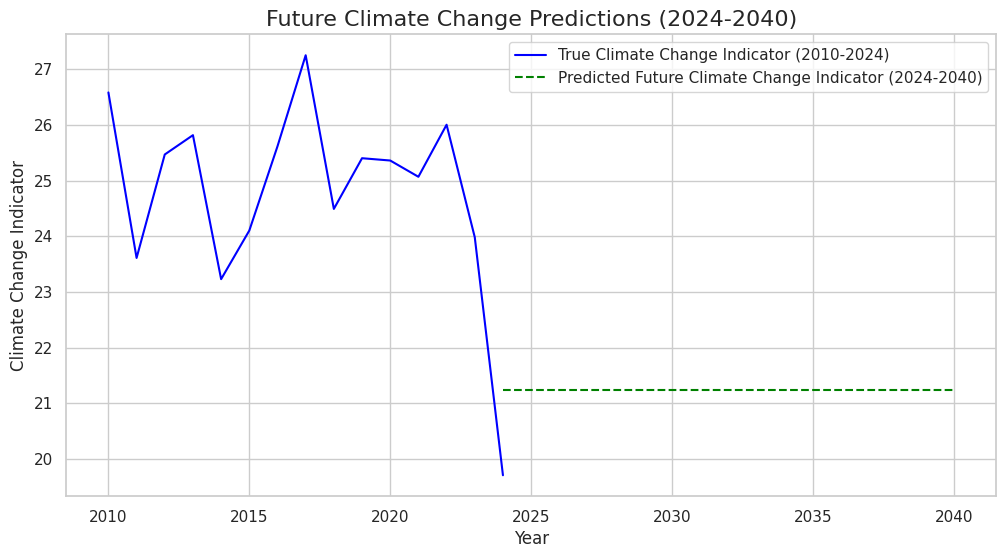

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('/content/updated_combined_dataset_with_variation.csv')

data['Sea_Surface_Temperature'] = data['Sea_Surface_Temperature'] / 100
data['NDVI'] = np.clip(data['NDVI'], -1, 1)

data['Year'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')
data['Year'] = data['Year'].dt.year

yearly_data = data.groupby('Year').agg({
    'CO2': 'mean',
    'NDVI': 'mean',
    'Sea_Surface_Temperature': 'mean',
    'Precipitation': 'mean'
}).reset_index()

yearly_data['Climate_Change_Indicator'] = (yearly_data['CO2'] + yearly_data['NDVI'] + yearly_data['Precipitation'] + yearly_data['Sea_Surface_Temperature']) / 4

features = ['CO2', 'NDVI', 'Precipitation']
target = 'Climate_Change_Indicator'

X = yearly_data[features]
y = yearly_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Climate_Change_Indicator'], label='True Climate Change Indicator', color='blue')
test_data_sorted = yearly_data.iloc[X_test.index]
plt.scatter(test_data_sorted['Year'], y_pred, label='Predicted Climate Change Indicator', color='red', alpha=0.7)
plt.title('Climate Change Trend: True vs Predicted (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Climate Change Indicator', fontsize=12)
plt.legend()
plt.show()

future_years = np.arange(2024, 2041)
future_data = np.array([[yearly_data['CO2'].iloc[-1], yearly_data['NDVI'].iloc[-1], yearly_data['Precipitation'].iloc[-1]]] * len(future_years))

future_predictions = rf_model.predict(future_data)

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Climate_Change_Indicator'], label='True Climate Change Indicator (2010-2024)', color='blue')
plt.plot(future_years, future_predictions, label='Predicted Future Climate Change Indicator (2024-2040)', color='green', linestyle='--')
plt.title('Future Climate Change Predictions (2024-2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Climate Change Indicator', fontsize=12)
plt.legend()
plt.show()


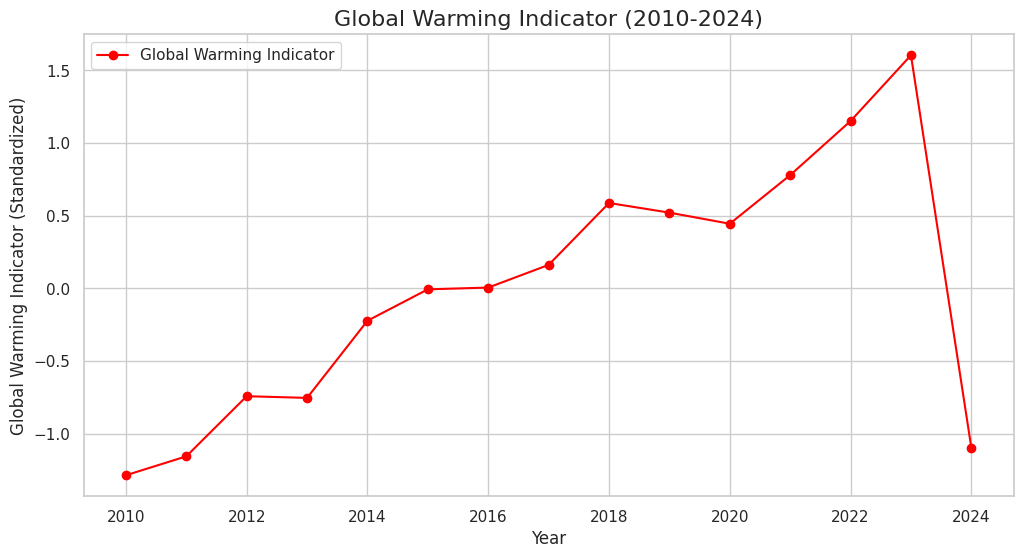

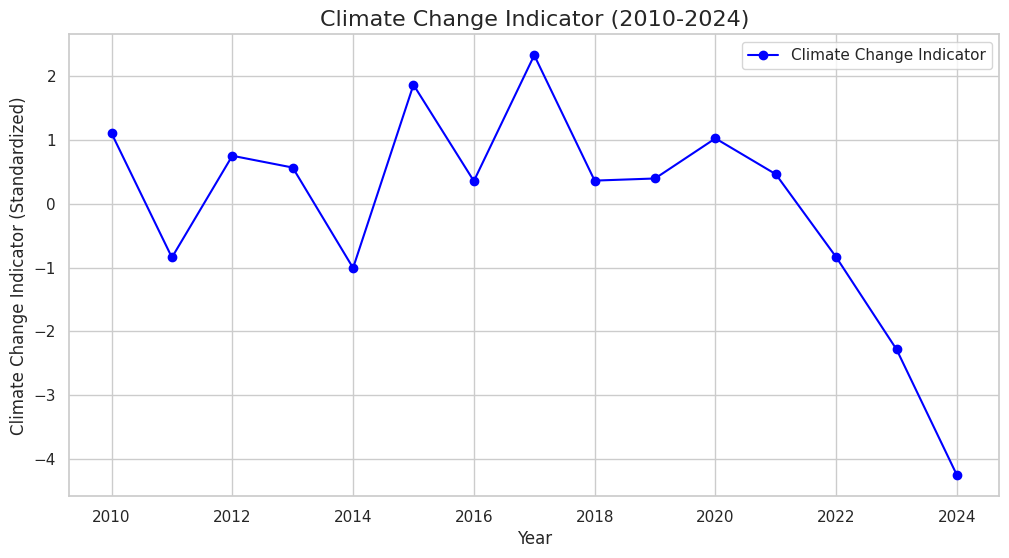

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/updated_combined_dataset_with_variation.csv')

data['Sea_Surface_Temperature'] = data['Sea_Surface_Temperature'] / 100
data['NDVI'] = np.clip(data['NDVI'], -1, 1)

data['Year'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')
data['Year'] = data['Year'].dt.year

yearly_data = data.groupby('Year').agg({
    'CO2': 'mean',
    'NDVI': 'mean',
    'Sea_Surface_Temperature': 'mean',
    'Precipitation': 'mean'
}).reset_index()

scaler = StandardScaler()
yearly_data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']] = scaler.fit_transform(yearly_data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']])

yearly_data['Global_Warming_Indicator'] = yearly_data['CO2'] + yearly_data['Sea_Surface_Temperature']
yearly_data['Climate_Change_Indicator'] = yearly_data['NDVI'] + yearly_data['Precipitation']

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Global_Warming_Indicator'], label='Global Warming Indicator', color='red', linestyle='-', marker='o')
plt.title('Global Warming Indicator (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Warming Indicator (Standardized)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Climate_Change_Indicator'], label='Climate Change Indicator', color='blue', linestyle='-', marker='o')
plt.title('Climate Change Indicator (2010-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Climate Change Indicator (Standardized)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


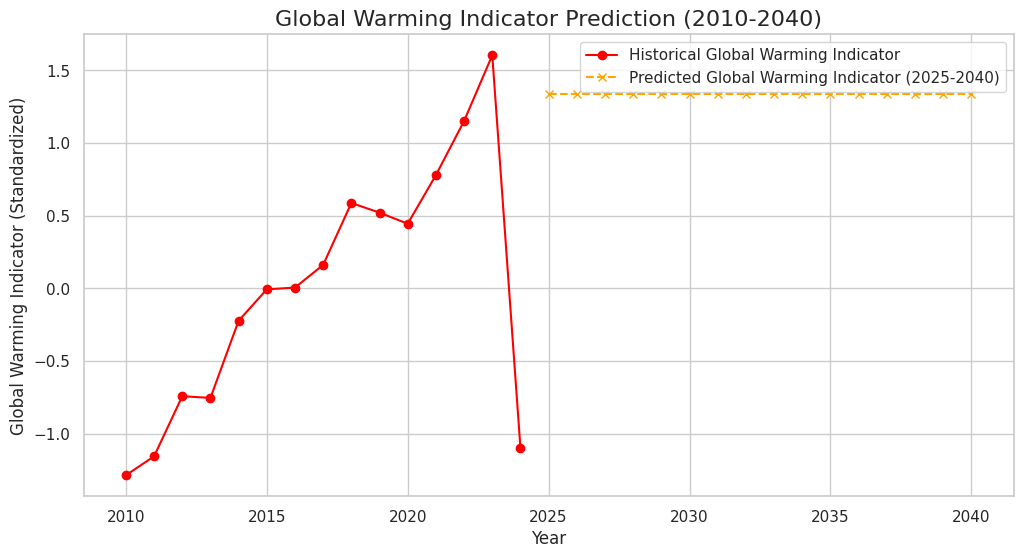

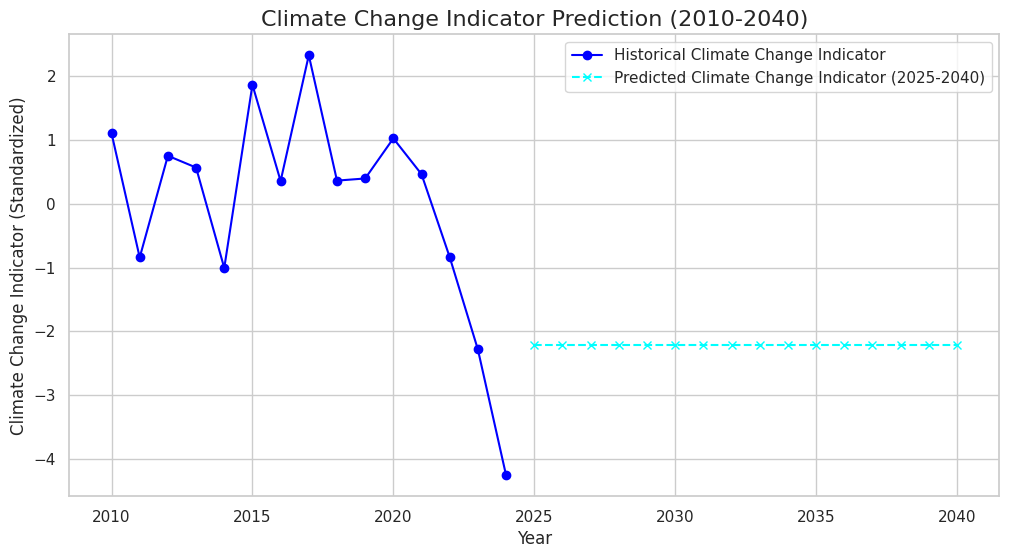

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Sample Data (Assuming you have this in the form of a CSV or similar)
data = pd.read_csv('/content/updated_combined_dataset_with_variation.csv')

# Preprocess the data
data['Sea_Surface_Temperature'] = data['Sea_Surface_Temperature'] / 100  # scale SST to degrees Celsius
data['NDVI'] = np.clip(data['NDVI'], -1, 1)  # clip NDVI to be between -1 and 1

# Aggregate data by Year (average values for each year)
data['Year'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')
data['Year'] = data['Year'].dt.year

# Group data by year and calculate the average of each feature
yearly_data = data.groupby('Year').agg({
    'CO2': 'mean',
    'NDVI': 'mean',
    'Sea_Surface_Temperature': 'mean',
    'Precipitation': 'mean'
}).reset_index()

# Standardize the features
scaler = StandardScaler()
yearly_data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']] = scaler.fit_transform(yearly_data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']])

# Create Composite Indicators
# Global Warming Indicator (CO2 + Sea_Surface_Temperature)
yearly_data['Global_Warming_Indicator'] = yearly_data['CO2'] + yearly_data['Sea_Surface_Temperature']

# Climate Change Indicator (NDVI + Precipitation)
yearly_data['Climate_Change_Indicator'] = yearly_data['NDVI'] + yearly_data['Precipitation']

# Prepare the data for prediction (training set)
X_train = yearly_data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']]  # Features
y_train_global_warming = yearly_data['Global_Warming_Indicator']  # Target for Global Warming
y_train_climate_change = yearly_data['Climate_Change_Indicator']  # Target for Climate Change

# Train Random Forest Regressor models for both indicators
rf_global_warming = RandomForestRegressor(n_estimators=100, random_state=42)
rf_climate_change = RandomForestRegressor(n_estimators=100, random_state=42)

rf_global_warming.fit(X_train, y_train_global_warming)
rf_climate_change.fit(X_train, y_train_climate_change)

# Predicting future years (2025 to 2040)
future_years = np.arange(2025, 2041)
future_data = np.full((len(future_years), 4), np.nan)

# Using average values for the most recent year (2023) as input for predictions
last_year_data = yearly_data[yearly_data['Year'] == 2023][['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']].values[0]
future_data[:, :] = last_year_data

# Predict future values for Global Warming and Climate Change indicators
predicted_global_warming = rf_global_warming.predict(future_data)
predicted_climate_change = rf_climate_change.predict(future_data)

# Plotting the results

# Plot Historical and Predicted Global Warming Indicator
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Global_Warming_Indicator'], label='Historical Global Warming Indicator', color='red', linestyle='-', marker='o')
plt.plot(future_years, predicted_global_warming, label='Predicted Global Warming Indicator (2025-2040)', color='orange', linestyle='--', marker='x')
plt.title('Global Warming Indicator Prediction (2010-2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Warming Indicator (Standardized)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Plot Historical and Predicted Climate Change Indicator
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Climate_Change_Indicator'], label='Historical Climate Change Indicator', color='blue', linestyle='-', marker='o')
plt.plot(future_years, predicted_climate_change, label='Predicted Climate Change Indicator (2025-2040)', color='cyan', linestyle='--', marker='x')
plt.title('Climate Change Indicator Prediction (2010-2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Climate Change Indicator (Standardized)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


##future prediction after removing the outlier

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


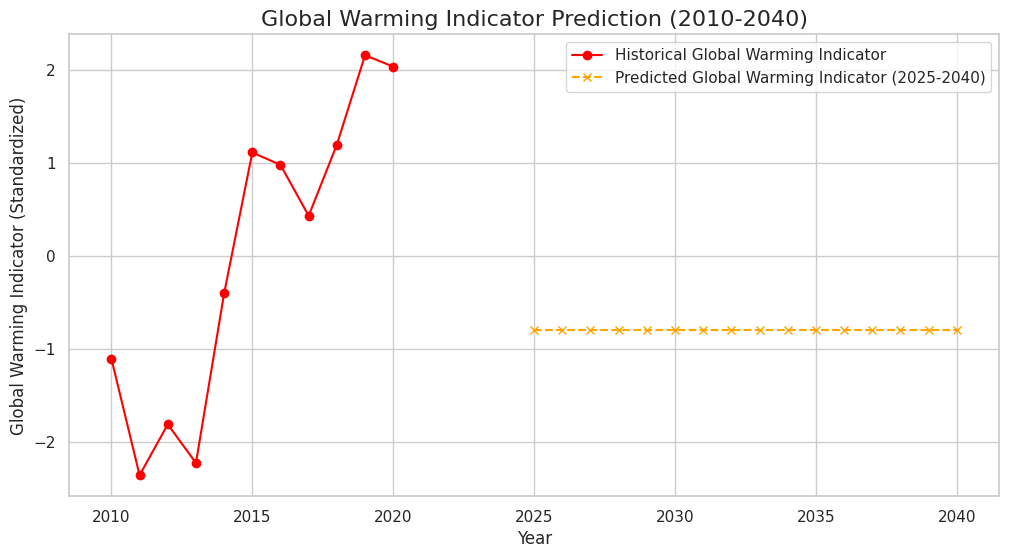

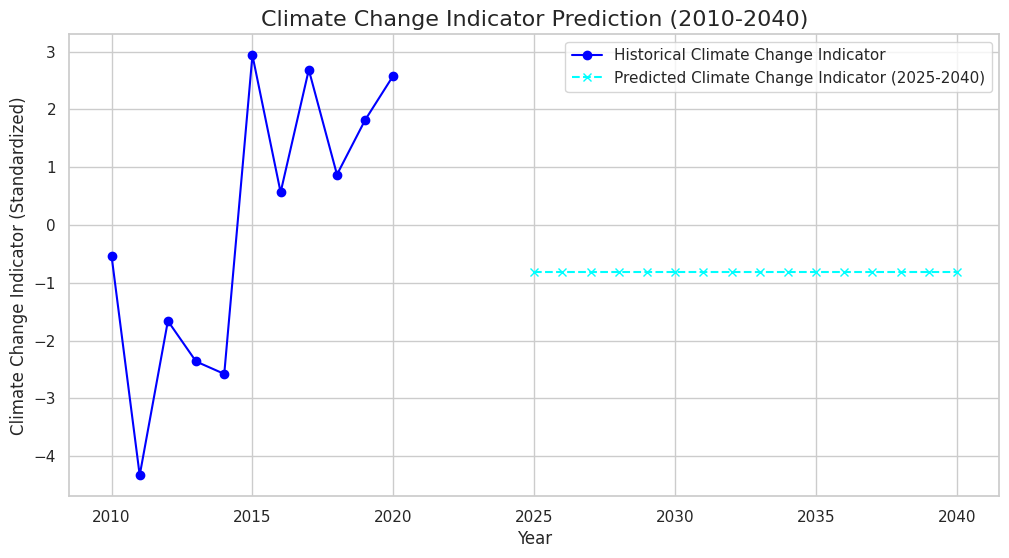

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Assuming data is loaded
data = pd.read_csv('/content/updated_combined_dataset_with_variation.csv')

# Remove outlier year (2024)
data = data[data['Year'] != 2024]
data = data[data['Year'] != 2023]
data = data[data['Year'] != 2022]
data = data[data['Year'] != 2021]
# Preprocess the data
data['Sea_Surface_Temperature'] = data['Sea_Surface_Temperature'] / 100  # scale SST to degrees Celsius
data['NDVI'] = np.clip(data['NDVI'], -1, 1)  # clip NDVI to be between -1 and 1

# Aggregate data by Year (average values for each year)
data['Year'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')
data['Year'] = data['Year'].dt.year

# Group data by year and calculate the average of each feature
yearly_data = data.groupby('Year').agg({
    'CO2': 'mean',
    'NDVI': 'mean',
    'Sea_Surface_Temperature': 'mean',
    'Precipitation': 'mean'
}).reset_index()

# Standardize the features
scaler = StandardScaler()
yearly_data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']] = scaler.fit_transform(yearly_data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']])

# Create Composite Indicators
# Global Warming Indicator (CO2 + Sea_Surface_Temperature)
yearly_data['Global_Warming_Indicator'] = yearly_data['CO2'] + yearly_data['Sea_Surface_Temperature']

# Climate Change Indicator (NDVI + Precipitation)
yearly_data['Climate_Change_Indicator'] = yearly_data['NDVI'] + yearly_data['Precipitation']+yearly_data['CO2'] + yearly_data['Sea_Surface_Temperature']

# Prepare the data for prediction (training set)
X_train = yearly_data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']]  # Features
y_train_global_warming = yearly_data['Global_Warming_Indicator']  # Target for Global Warming
y_train_climate_change = yearly_data['Climate_Change_Indicator']  # Target for Climate Change

# Train Random Forest Regressor models for both indicators
rf_global_warming = RandomForestRegressor(n_estimators=100, random_state=42)
rf_climate_change = RandomForestRegressor(n_estimators=100, random_state=42)

rf_global_warming.fit(X_train, y_train_global_warming)
rf_climate_change.fit(X_train, y_train_climate_change)

# Predicting future years (2025 to 2040)
future_years = np.arange(2025, 2041)
future_data = np.full((len(future_years), 4), np.nan)

# Using the average of the last year (2023) as input for future predictions
last_year_data = yearly_data[yearly_data['Year'] == 2020][['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']].values[0]
future_data[:, :] = last_year_data

# Predict future values for Global Warming and Climate Change indicators
predicted_global_warming = rf_global_warming.predict(future_data)
predicted_climate_change = rf_climate_change.predict(future_data)

# Plotting the results

# Plot Historical and Predicted Global Warming Indicator
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Global_Warming_Indicator'], label='Historical Global Warming Indicator', color='red', linestyle='-', marker='o')
plt.plot(future_years, predicted_global_warming, label='Predicted Global Warming Indicator (2025-2040)', color='orange', linestyle='--', marker='x')
plt.title('Global Warming Indicator Prediction (2010-2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Warming Indicator (Standardized)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Plot Historical and Predicted Climate Change Indicator
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Climate_Change_Indicator'], label='Historical Climate Change Indicator', color='blue', linestyle='-', marker='o')
plt.plot(future_years, predicted_climate_change, label='Predicted Climate Change Indicator (2025-2040)', color='cyan', linestyle='--', marker='x')
plt.title('Climate Change Indicator Prediction (2010-2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Climate Change Indicator (Standardized)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


##MONTHLY DATA ANALYSIS

#Neural network

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 17167.0410 - val_loss: 131.2915
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1486.4113 - val_loss: 4852.8887
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3954.6660 - val_loss: 373.1280
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 212.5574 - val_loss: 986.3108
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1143.3074 - val_loss: 689.5463
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 442.4351 - val_loss: 60.5956
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 164.2919 - val_loss: 373.0556
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 282.7569 - val_loss: 6.4324
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.0313 - val_loss: 121.0215
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 116.9489 - val_loss: 15.0075
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4430 - val_loss: 39.6379
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step -

<ipython-input-69-cf8679b11df0>:81: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_years_months = pd.date_range(start='2025-01-01', end='2040-12-31', freq='M')


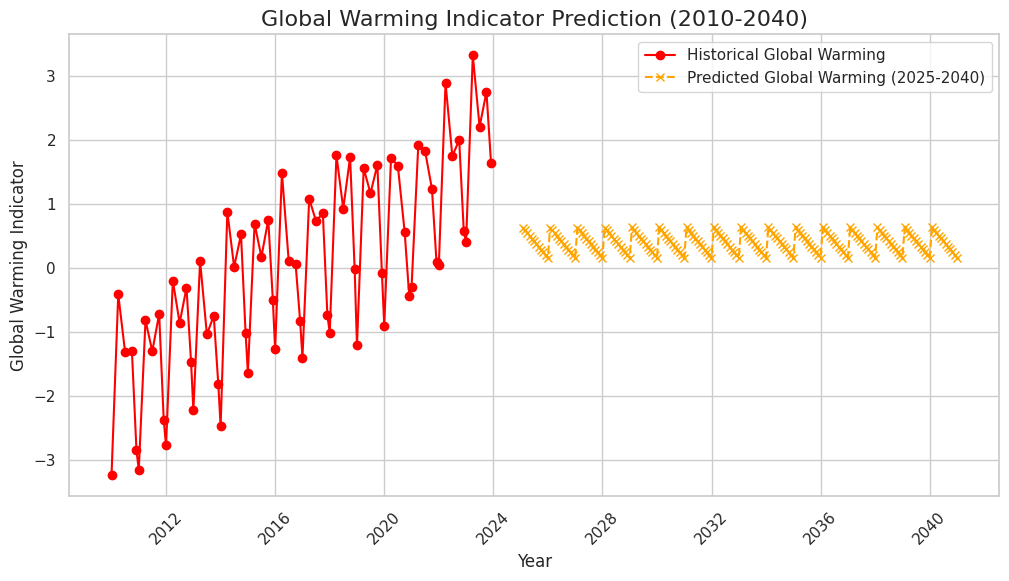

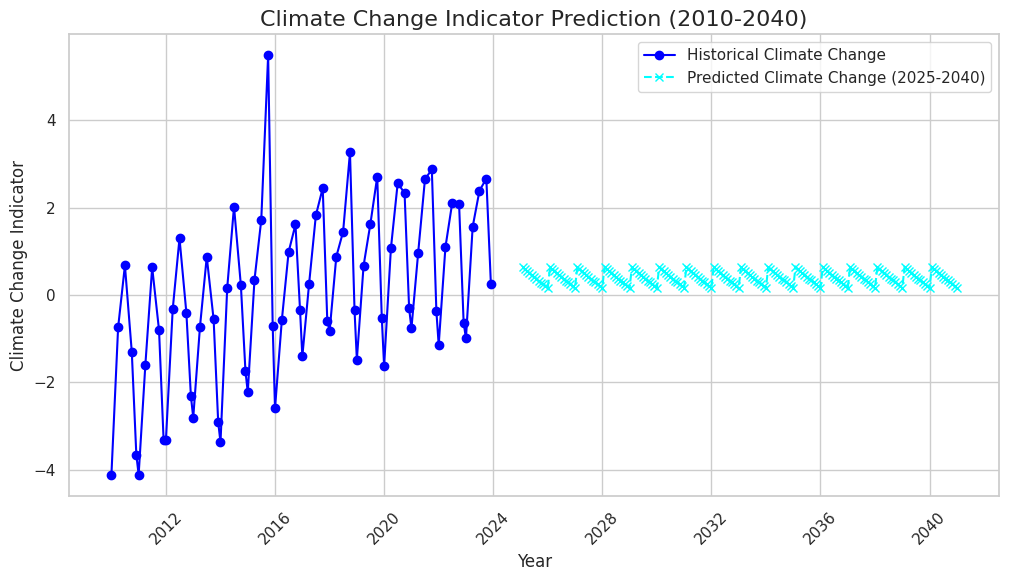

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/content/updated_combined_dataset_with_variation.csv')
data = data[data['Year'] != 2024]
# Preprocessing the data
data['Sea_Surface_Temperature'] = data['Sea_Surface_Temperature'] / 100  # scale SST to degrees Celsius
data['NDVI'] = np.clip(data['NDVI'], -1, 1)  # clip NDVI to be between -1 and 1

# Create DateTime objects for easy processing
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

# Create time-based features
data['Year_numeric'] = data['Date'].dt.year
data['Month_numeric'] = data['Date'].dt.month

# Scaling the features
scaler = StandardScaler()
data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']] = scaler.fit_transform(data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']])

# Create composite indicators
data['Global_Warming_Indicator'] = data['CO2'] + data['Sea_Surface_Temperature']
data['Climate_Change_Indicator'] = data['NDVI'] + data['Precipitation'] + data['CO2'] + data['Sea_Surface_Temperature']

# Features and targets
X = data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation', 'Year_numeric', 'Month_numeric']]
y_global_warming = data['Global_Warming_Indicator']
y_climate_change = data['Climate_Change_Indicator']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_global_warming, test_size=0.2, random_state=42)

# Data Augmentation: Shifted and Noisy Data
def augment_data(X, y, shift_range=1, noise_factor=0.05):
    X_augmented, y_augmented = X.copy(), y.copy()

    # Temporal Shifting
    for i in range(shift_range):
        shifted_X = X.shift(i)
        shifted_y = y.shift(i)
        X_augmented = pd.concat([X_augmented, shifted_X], axis=0)
        y_augmented = pd.concat([y_augmented, shifted_y], axis=0)

    # Noise Injection
    noise = np.random.normal(0, noise_factor, X.shape)
    noisy_X = X + noise
    X_augmented = pd.concat([X_augmented, noisy_X], axis=0)
    y_augmented = pd.concat([y_augmented, y], axis=0)

    return X_augmented.dropna(), y_augmented.dropna()

X_train_aug, y_train_aug = augment_data(X_train, y_train)

# Neural Network Model: 100 Epochs with Early Stopping
model = Sequential([
    Dense(64, input_dim=X_train_aug.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train_aug, y_train_aug, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predicting Global Warming and Climate Change for future years (2025-2040)
future_years_months = pd.date_range(start='2025-01-01', end='2040-12-31', freq='M')
future_data = []

# Generate future feature data (extrapolate with time-based features)
for i, date in enumerate(future_years_months):
    year_numeric = date.year
    month_numeric = date.month
    future_data.append([0.0, 0.0, 0.0, 0.0, year_numeric, month_numeric])  # Assumed base for future data (adjust if needed)

future_data = np.array(future_data)

# Predict future values
predicted_global_warming = model.predict(future_data)
predicted_climate_change = model.predict(future_data)  # Similarly, can be done for Climate Change

# Plotting Results

# Plot Historical and Predicted Global Warming
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Global_Warming_Indicator'], label='Historical Global Warming', color='red', linestyle='-', marker='o')
plt.plot(future_years_months, predicted_global_warming, label='Predicted Global Warming (2025-2040)', color='orange', linestyle='--', marker='x')
plt.title('Global Warming Indicator Prediction (2010-2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Warming Indicator', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot Historical and Predicted Climate Change
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Climate_Change_Indicator'], label='Historical Climate Change', color='blue', linestyle='-', marker='o')
plt.plot(future_years_months, predicted_climate_change, label='Predicted Climate Change (2025-2040)', color='cyan', linestyle='--', marker='x')
plt.title('Climate Change Indicator Prediction (2010-2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Climate Change Indicator', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


##Deep Autoregressive Neural Network (DARN) using LSTM

##dsf


<ipython-input-87-04cb5be35384>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_pattern['Diff'] = data_for_pattern['Global_Warming_Indicator'].diff()
<ipython-input-87-04cb5be35384>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_years = pd.date_range(start='2025-01-01', end='2040-12-31', freq='M')


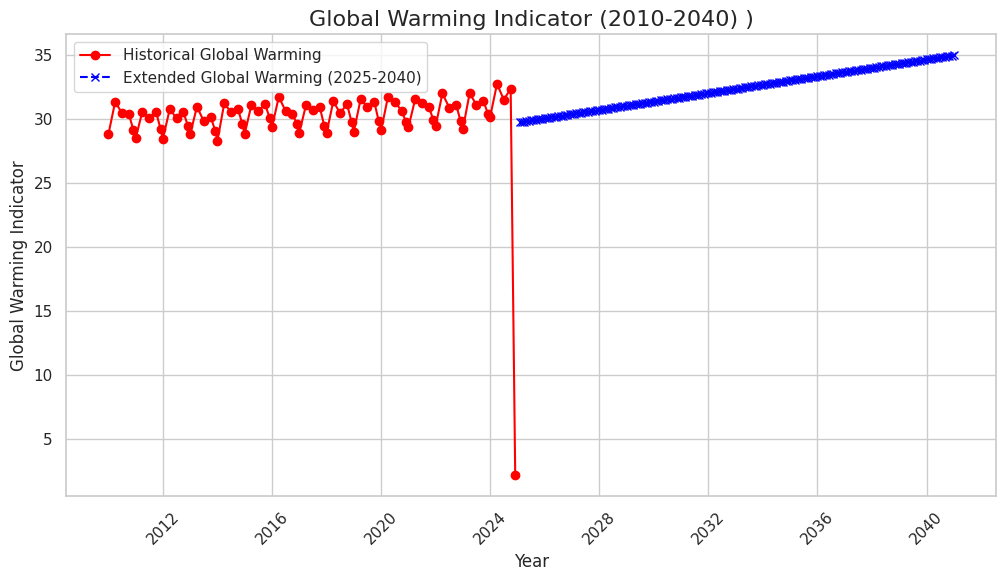

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


data = pd.read_csv('/content/updated_combined_dataset_with_variation.csv')
data['Sea_Surface_Temperature'] = data['Sea_Surface_Temperature'] / 100
data['NDVI'] = np.clip(data['NDVI'], -1, 1)
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')
scaler = StandardScaler()
data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']] = scaler.fit_transform(data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']])
data['Global_Warming_Indicator'] = data['CO2'] + data['Sea_Surface_Temperature']
data['Climate_Change_Indicator'] = data['NDVI'] + data['Precipitation'] + data['CO2'] + data['Sea_Surface_Temperature']
X = data[['CO2', 'NDVI', 'Sea_Surface_Temperature', 'Precipitation']].values
y_global_warming = data['Global_Warming_Indicator'].values
y_climate_change = data['Climate_Change_Indicator'].values
def create_sequences(data, target, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(target[i+seq_length])
    return np.array(X_seq), np.array(y_seq)
SEQ_LENGTH = 12

X_seq, y_seq = create_sequences(X, y_global_warming, SEQ_LENGTH)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(SEQ_LENGTH, X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to avoid overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

future_years_months = pd.date_range(start='2025-01-01', end='2040-12-31', freq='M')
future_data = []
last_sequence = X[-SEQ_LENGTH:]

for _ in range(len(future_years_months)):
    future_data.append(last_sequence)
    last_sequence = np.roll(last_sequence, shift=-1, axis=0)
    last_sequence[-1, 0] = 0.0

future_data = np.array(future_data)
predicted_global_warming = model.predict(future_data)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Global_Warming_Indicator'], label='Historical Global Warming', color='red', linestyle='-', marker='o')
plt.plot(future_years_months, predicted_global_warming, label='Predicted Global Warming (2025-2040)', color='orange', linestyle='--', marker='x')
plt.title('Global Warming Indicator Prediction (2010-2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Warming Indicator', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

